In [4]:
"""
This service will run once per day at 8pm local time and scrap the 20 top articles of each news website.
"""

from newspaper import build
from newspaper import Article
from textblob import TextBlob
import nltk
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
import schedule
import time

nltk.download("punkt")

irish_news = [
    {
        "outlet": "The Independent",
        "url": "https://www.independent.ie/",
        "slugs": ["blabla"],
        "bad_urls": [
            "https://www.independent.ie/news/environment/",
            "https://www.independent.ie/entertainment/radio/",
        ],
    },
    {
        "outlet": "RTE",
        "url": "https://www.rte.ie/",
        "slugs": ["blabla"],
        "bad_urls": [
            "https://www.rte.ie/radio/radio1/",
            "https://www.rte.ie/radio/podcasts/",
            "https://www.rte.ie/news/business/",
            "https://www.rte.ie/radio/2fm/",
            "https://www.rte.ie/radio/lyricfm/",
            "https://www.rte.ie/radio/rnag/",
            "https://www.rte.ie/news/ukraine/",
        ],
    },
    # {
    #     "outlet": "The Irish Times",
    #     "url": "https://www.irishtimes.com/",
    #     "slugs": ["blabla"],
    #     "bad_urls": ["blabla"],
    # },
    {
        "outlet": "The Irish Mirror",
        "url": "https://www.irishmirror.ie/",
        "slugs": ["#comments-wrapper"],
        "bad_urls": [
            "https://www.irishmirror.ie/news/news-opinion/",
            "https://www.irishmirror.ie/news/world-news/",
            "https://www.irishmirror.ie/news/irish-news/education/",
            "https://www.irishmirror.ie/news/irish-news/politics/",
            "https://www.irishmirror.ie/news/irish-news/crime/",
            "https://www.irishmirror.ie/news/irish-news/",
        ],
    },
    {
        "outlet": "The BBC",
        "url": "https://www.bbc.com/",
        "slugs": ["blabla"],
        "bad_urls": [
            "https://www.bbc.com/news/world/europe",
            "https://www.bbc.com/news/world",
            "https://www.bbc.com/news",
            "https://www.bbc.com/news/uk",
            "https://www.bbc.com/news/world/asia",
            "https://www.bbc.com/news/entertainment_and_arts",
            "https://www.bbc.com/news/world/asia/india",
        ],
    },
    {
        "outlet": "The Daily Mail",
        "url": "https://www.dailymail.co.uk/",
        "slugs": ["#comments", "#video", "columnist"],
        "bad_urls": [
            "https://www.dailymail.co.uk/news/the_queen/index.html",
            "https://www.dailymail.co.uk/news/columnist-1012802/Mail-Sunday-Comment.html",
        ],
    },
    {
        "outlet": "The Sun",
        "url": "https://www.thesun.ie/",
        "slugs": ["blabla"],
        "bad_urls": [
            "https://www.thesun.ie/news/irish-news/",
        ],
    },
    {
        "outlet": "The Guardian",
        "url": "https://www.theguardian.com/",
        "slugs": ["blabla"],
        "bad_urls": [
            "https://www.theguardian.com/mobile/2014/may/29/the-guardian-for-mobile-and-tablet",
        ],
    },
    {
        "outlet": "The Irish Examiner",
        "url": "https://www.irishexaminer.com/",
        "slugs": ["=/news", "wishlist_topic", "budget2023_topic"],
        "bad_urls": [
            "https://www.irishexaminer.com/news/politics/",
            "https://www.irishexaminer.com/news/courtandcrime/",
            "https://www.irishexaminer.com/news/spotlight/",
            "https://www.irishexaminer.com/news/history/",
            "https://www.irishexaminer.com/news/munster/",
            "https://www.irishexaminer.com/news/ireland/",
        ],
    },
    {
        "outlet": "The Journal",
        "url": "https://www.thejournal.ie/",
        "slugs": ["evening-fix-sign-up", "newsletter", "the-explainer", "#comments"],
        "bad_urls": [
            "https://www.thejournal.ie/russian-protests/news/",
            "https://www.thejournal.ie/energy-security/news/",
            "https://www.thejournal.ie/cork/news/",
            "https://www.thejournal.ie/budget-2023/news/",
            "https://www.thejournal.ie/brothers-of-italy/news/",
            "https://www.thejournal.ie/ratheniska/news/",
            "https://www.thejournal.ie/property-magazine/news/",
            "https://www.thejournal.ie/climate-change/news/",
            "https://www.thejournal.ie/ukraine/news/",
            "https://www.thejournal.ie/the-good-information-project/news/",
            "https://www.thejournal.ie/factcheck/news/",
            "https://www.thejournal.ie/psni/news/",
            "https://www.thejournal.ie/iran-protests/news/",
        ],
    },
]




[nltk_data] Downloading package punkt to /home/fox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:

def ireland():
    print("\nI'm working...")

    for item in irish_news:
        news_outlet = item["outlet"]
        # print("\nnewspaper: ", news_outlet)
        articles = []
        paper_articles = build(
            item["url"], memoize_articles=False, fetch_images=False, MIN_WORD_COUNT=400
        )
        for article in paper_articles.articles:
            # check to see if the article url doesn't already exist in the list
            if article.url not in urls_set:
                # and that the url is not in the bad_urls list
                if article.url not in item["bad_urls"]:
                    # and that the url doesn't lead to a video or a comment section
                    if any(slug in article.url for slug in item["slugs"]):
                        bad_urls.append(article.url)
                    else:
                        urls_set.add(article.url)
                        articles.append(article.url)
                else:
                    bad_urls.append(article.url)
            if len(articles) == 20:
                break

        ### Retrieve metadata and text for each article ###

        for i in articles:
            my_article = Article(i, language="en")

            try:
                my_article.download()
                my_article.parse()
                my_article.nlp()
            except:
                # print("\narticle failed to download")
                # print(i)
                continue

            url = i
            
            text = TextBlob(my_article.text)
            

            """
            Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.
            Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.
            """
            polarity = text.sentiment.polarity
            subjectivity = text.sentiment.subjectivity

            # print("\ntitle: ", title)
            # print("url: ", url)
            # print("\nkeywords: ", keywords)
            # print("\npolarity: ", polarity)
            # print("\nsubjectivity: ", subjectivity)
            # print("\nsummary: ", my_article.summary)

            data.append(
                [date, news_outlet, url, my_article.title, my_article.text, my_article.keywords, polarity, subjectivity]
            )

    # print("\ntime: ", datetime.now())
    print("\nnumber of articles in the database: ", len(data))
    # print("\nbad urls:")
    # for i in bad_urls:
    #     print(i)
    return


In [6]:
date = datetime.today().strftime("%Y-%m-%d")
data = []
urls_set = set()
bad_urls = []

ireland()


I'm working...

number of articles in the database:  178


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

[date, news_outlet, url, title, text, keywords, polarity, subjectivity]

In [10]:
data[0][3]

'Gardaí routinely cancelled 999 emergency calls when changing shifts, according to new whistleblower'

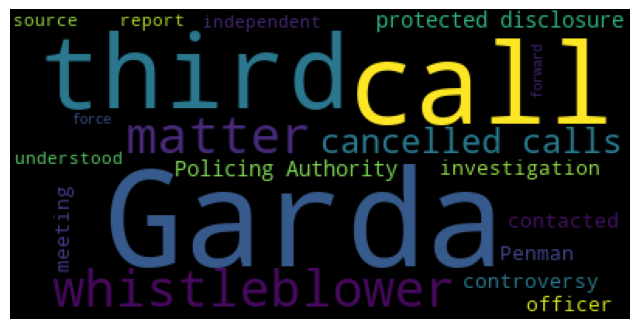

Gardaí routinely cancelled 999 emergency calls when changing shifts, according to new whistleblower
['investigation', 'authority', 'officer', 'garda', 'according', '999', 'gardaí', 'shifts', 'routinely', 'emergency', 'whistleblower', 'changing', 'calls', 'meeting', 'protected', 'cancelled', 'policing', 'matter']
0.021178451178451182


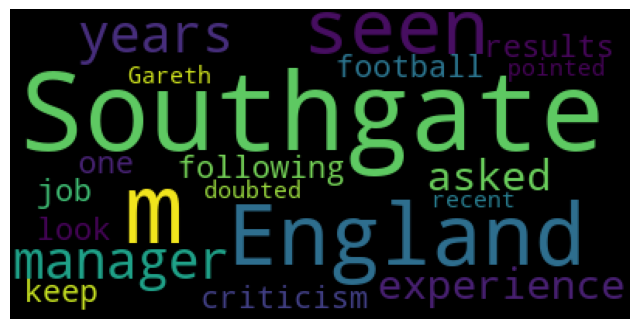

Gareth Southgate ‘not hiding’ from criticism as England gear up to face Germany
['seen', 'criticism', 'im', 'gareth', 'face', 'england', 'manager', 'football', 'results', 'experience', 'germany', 'southgate', 'job', 'following', 'hiding', 'gear']
0.08469387755102042


In [16]:
for i in range(10):
    # Wordcloud
    text = data[i][4]

    # stopwords is simply a set of words to be eliminated
    # if STOPWORDS not manually set, then this default list will be used
    stopwords = set(STOPWORDS)
    #if you want to add to the stopwords list, here I add some news sources
    stopwords.update(['s','t', 'm', 'Mr','later','will'])
    # Create and generate a basic word cloud image:
    wordcloud = WordCloud(stopwords=stopwords,max_words=20,background_color="black").generate(text)
    # Display the generated image:
    plt.figure(figsize=[8,8])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    print(data[i][3])
    print(data[i][5])
    print(data[i][6])